## Use pretrained network from Keras

#### Goal

- Aquire image directly online
- Use VGG16 as feature extractor and visualize the features
- Classify image using Xception

In [1]:
import numpy as np
from keras.utils.data_utils import get_file

Using TensorFlow backend.


In [2]:
fpath = get_file(fname='dog-from-online-0.jpg',origin='http://r.ddmcdn.com/s_f/o_1/cx_633/cy_0/cw_1725/ch_1725/w_720/APL/uploads/2014/11/too-cute-doggone-it-video-playlist.jpg')

In [3]:
from keras.preprocessing import image

In [4]:
img = image.load_img(fpath)

In [5]:
import matplotlib.pyplot as plt

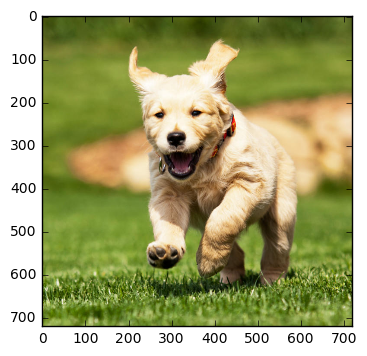

In [6]:
plt.imshow(img);plt.show()

In [7]:
img.height,img.width

(720, 720)

### Exercise on VGG16

In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
model = VGG16(include_top=False)
img.resize((224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [10]:
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)

features = model.predict(x)

In [11]:
features.shape

(1, 22, 22, 512)

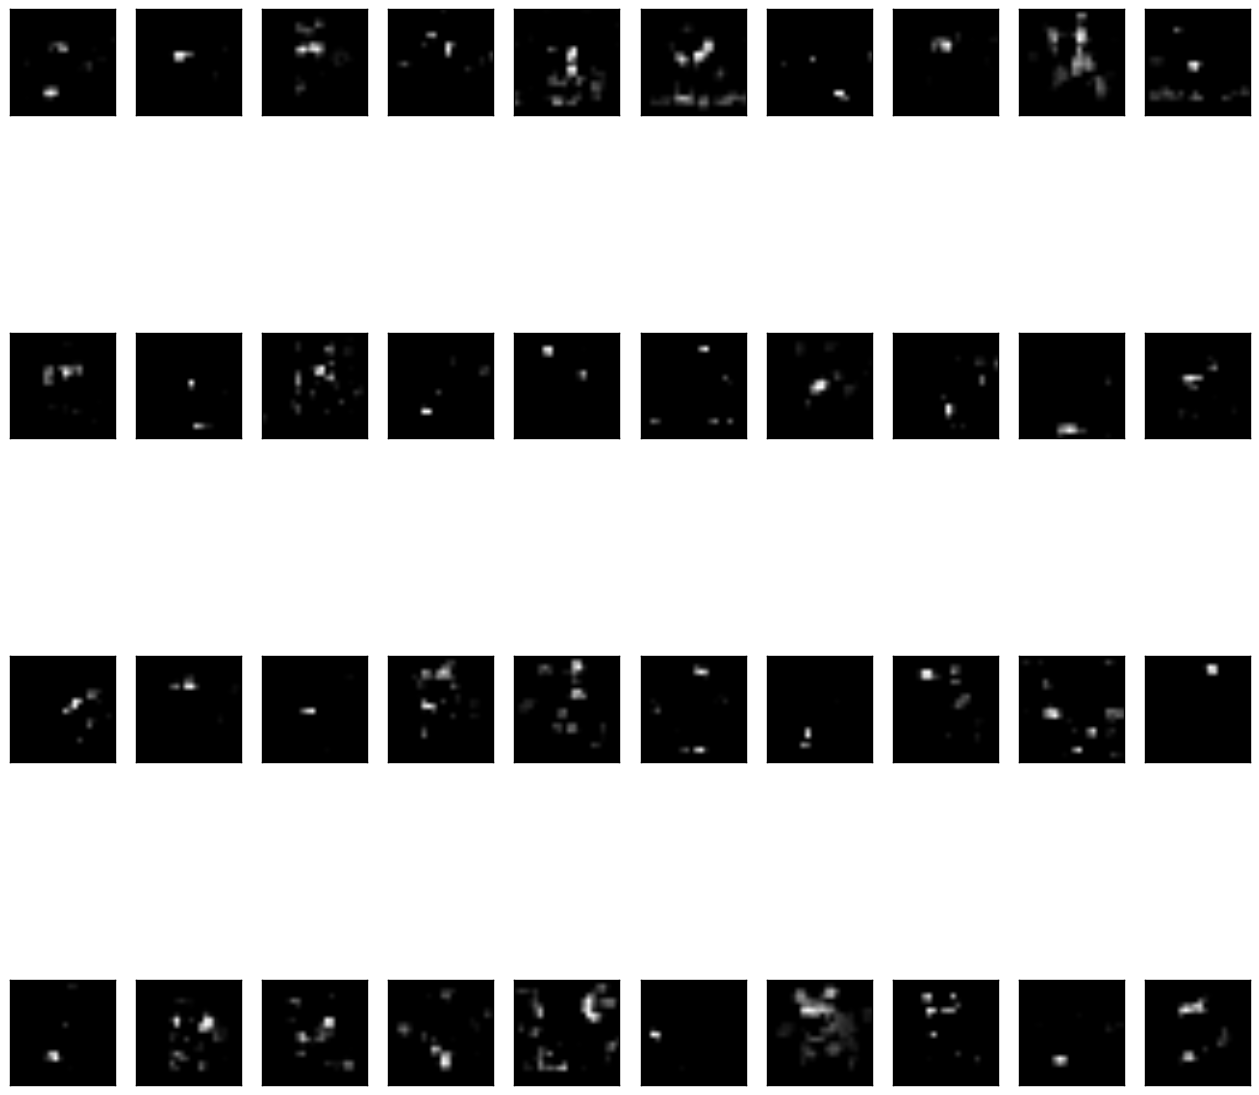

In [12]:
# The first 64 channels from VGG16
n_x = 4
n_y = 10
fig,ax = plt.subplots(n_x,n_y,figsize=[16,16])
for j in range(n_x * n_y):    
    ax[j//n_y,j%n_y].set_xticks([])
    ax[j//n_y,j%n_y].set_yticks([])
    ax[j//n_y,j%n_y].imshow(features[0,:,:,j],cmap='gray')
plt.show()

### Exercise on Xception

In [13]:
from keras.applications.xception import Xception

In [14]:
from keras.applications.xception import preprocess_input

model = Xception()

In [15]:
img = image.load_img(fpath)
img = img.resize((299,299))
# 299 for inception and xception

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
preds = model.predict(x)

In [17]:
from keras.applications.imagenet_utils import decode_predictions

In [18]:
decode_predictions(preds)

[[('n02099601', 'golden_retriever', 0.66968632),
  ('n02102318', 'cocker_spaniel', 0.16020975),
  ('n04409515', 'tennis_ball', 0.028702011),
  ('n02099712', 'Labrador_retriever', 0.018884677),
  ('n02094114', 'Norfolk_terrier', 0.015390391)]]

In [26]:
int(decode_predictions(preds)[0][0][0][1:9])

2099601

In [28]:
pwd

'C:\\gitLocal\\ML\\keras'